In [2]:
import pandas as pd

book = pd.read_csv("/content/book_data.csv")
book.head(1)

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Kristin Hannah,"Alaska, 1974.Unpredictable. Unforgiving. Untam...",NaN,Kindle Edition,NaN,435 pages,4.33,146505,17438,The Great Alone,Fiction|Historical|Historical Fiction|Audioboo...,https://images.gr-assets.com/books/1501852423l...


In [3]:
import pickle
filename = '/content//tfidf'
output = open(filename,'rb')
new_dict = pickle.load(output)
output.close()

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(new_dict)

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = book.loc[book['book_title'].isin([title])]
    idx = idx.index
    sim_scores = list(enumerate(cosine_sim[idx][0]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:5]
    indices = [i[0] for i in sim_scores]
    return book['book_title'].iloc[indices]
    sim_scores = sim_scores[1:5]
    movie_indices = [i[0] for i in sim_scores]
    return book['book_title'].iloc[indices]

In [5]:
hasil = get_recommendations("Circe")

In [9]:
hasil = hasil.values.tolist()
hasil[1]

'The Sky Is Yours'

In [7]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

def recommendations(title):
    cosine_similarities = cosine_similarity(new_dict,  new_dict)
    books = book[['book_title', 'image_url']]
    indices = pd.Series(book.index, index = book['book_title']).drop_duplicates()
         
    idx = indices[title]
    sim_scores = list(enumerate(cosine_similarities[idx]))
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse = True)
    sim_scores = sim_scores[1:6]
    book_indices = [i[0] for i in sim_scores]
    recommend = books.iloc[book_indices]
    for index, row in recommend.iterrows():

        response = requests.get(row['image_url'])
        img = Image.open(BytesIO(response.content))
        plt.figure()
        plt.imshow(img)
        plt.title(row['book_title'])

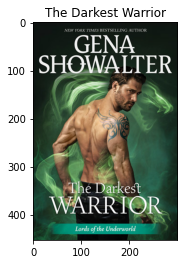

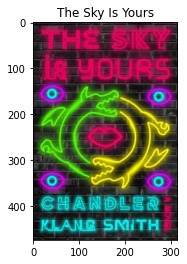

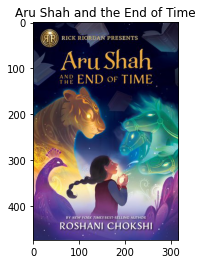

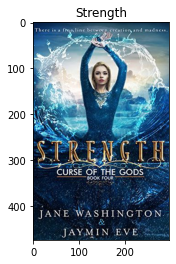

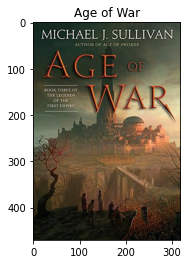

In [8]:
recommendations("Circe")